# Analisando o engajamento do Instagram - Parte 2: Tags

### O que queremos responder?
- Qual a tag mais engaja nessas publicações?
    - Agora queremos olhar apenas tags
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [1]:
# Importando o pandas
import pandas as pd
import numpy as np
import PIL
# Usando o mesmo formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Importar a base em excel
base_df = pd.read_excel("08. Analisando o engajamento no Instagram.xlsx")

In [3]:
base_df.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [4]:
# Apagando a coluna "Visualizações"
base_df = base_df.drop(columns='Visualizações')

In [5]:
# Visualizando novamente as 5 primeiras linhas
base_df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [6]:
# Agrupando por tags
base_df.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas                 17,975.00
Datas comemorativas/Promoções       29,084.00
Dicas de como usar/Novos Produtos    5,703.50
Dicas de como usar/Produtos          7,586.67
Influenciadores                     15,197.29
Loja                                 2,832.50
Loja/Produtos                        2,930.00
Novos Produtos                      11,619.57
Produtos                             5,666.92
Promoções                           26,645.50
Trends                              22,400.67
Trends/Produtos                     12,894.00
Name: Curtidas, dtype: float64

### Para conseguir analisar separadamente as tags, podemos dividir linhas com 2 tags em 2 linhas
- Para isso primeiro vamos usar o split para separar em uma lista com as tags
- Depois vamos usar o explode para transformar as listas com 2 tags em 2 linhas diferentes

**O split separa um texto em uma lista baseado em algum separador**

In [7]:
# Vamos usar isso para a nossa coluna "Tags"
# Transformando a coluna Tags em uma lista de tags
base_df.Tags = base_df.Tags.str.split("/")
base_df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,NaN,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,NaN,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,NaN,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,NaN,4437


**O explode vai separar uma coluna de um DataFrame em 1 linha para cada elemento da lista**

- Tudo que estiver em lista será separado em 1 linha por elemento da lista
- Se não tiver na lista, o elemento será mantido
- Listas vazias vão ter o valor de `NaN`
<br><br>
- Para as outras colunas, elas irão repetir os seus valores
- Inclusive o índice também irá repetir

In [8]:
# Separando a coluna Tag em 1 linha para cada elemento da lista
base_df = base_df.explode('Tags')
base_df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,NaN,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164


### Fazendo a mesma análise da média por tag

**Aviso importante: muito cuidado pois as outras colunas serão duplicadas, então não podemos fazer o mesmo cálculo de média que estávamos fazendo**
<br><br>
- No arquivo anterior:


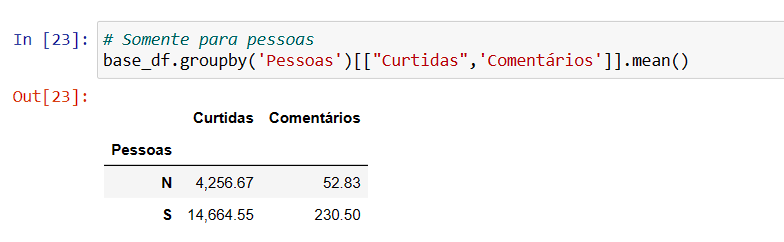

In [9]:
PIL.Image.open('imagem.png')

In [10]:
# Repetindo o cálculo da média para pessoas
base_df.groupby(['Pessoas'])[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,154.62",50.92
S,"14,100.57",225.87


A diferença entre as médias acontece pelo fato de as linhas onde tem duas tags, serem duplicadas.

**Só vamos fazer as análises que envolve tag depois de fazer isso com a base**

In [11]:
# Fazendo para Tag
base_df.groupby(['Tags'])['Curtidas'].mean()

Tags
Datas comemorativas   20,752.25
Dicas de como usar     6,833.40
Influenciadores       15,197.29
Loja                   2,865.00
Novos Produtos        10,304.89
Produtos               6,269.82
Promoções             27,458.33
Trends                20,024.00
Name: Curtidas, dtype: float64

In [12]:
# Ordenando por curtidas
base_df.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values("Curtidas",ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


- **Postagens de promoções são as que mais engajam**
- **Além de promoções, datas comemorativas e trends também possuem um bom engajamento**

**E o que está sem tag?**

In [13]:
# Filtrando valores sem tag
base_df.loc[base_df.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,NaN,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,NaN,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,NaN,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,NaN,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,NaN,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737


**Da mesma forma que fizemos para Carrossel, poderíamos ter feito para as tags escrevendo "Sem tag" e nesse caso iria aparecer no groupby**

In [14]:
# Atribuindo o texto sem tag para as colunas onde a tag é NaN
base_df['Tags'] = base_df.Tags.fillna('Sem Tags')

In [15]:
# Mostrando novamente a tabela de curtidas por tag
base_df.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Sem Tags,"15,347.88",207.75
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


In [16]:
# Podemos voltar como NaN caso a gente queira somente ignorar esses valores conforme orientado
base_df.loc[base_df['Tags']  == 'Sem Tags', "Tags"] = np.nan

In [17]:
# E voltamos com as colunas com valores nulos
base_df.loc[base_df.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,NaN,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,NaN,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,NaN,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,NaN,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,NaN,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737


In [18]:
# E essas linhas novamente param de ser consideradas na agregação
base_df.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values("Curtidas",ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


**Agora analisando as tags com pessoas e campanhas:**

In [19]:
# Fazendo para Pessoas e Tag
base_df.groupby(['Pessoas', "Tags"])[["Curtidas","Comentários"]].mean()

Curtidas  Comentários
Pessoas Tags                                      
N       Loja                 2,865.00        17.67
        Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
S       Datas comemorativas 20,752.25       343.50
        Dicas de como usar   6,833.40       133.60
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Promoções           27,458.33       531.00
        Trends              20,024.00       352.25

In [20]:
# Também podemos ordenar por curtidas
base_df.groupby(['Pessoas', "Tags"])[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

In [21]:
# Fazendo para Campanhas e Tag
base_df.groupby(['Campanhas', "Tags"])[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Campanhas Tags                                      
S         Promoções           33,217.50       490.50
          Trends              22,400.67       386.67
          Datas comemorativas 20,752.25       343.50
          Influenciadores     18,715.40       197.60
N         Promoções           15,940.00       612.00
          Trends              12,894.00       249.00
S         Novos Produtos      11,040.67       323.00
N         Novos Produtos       9,937.00       136.33
S         Produtos             9,074.00        67.50
N         Dicas de como usar   6,833.40       133.60
          Influenciadores      6,402.00        72.00
          Produtos             5,895.93        97.67
          Loja                 2,865.00        17.67

## Conclusões
- **Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação**
    - Em todas as tags, quando havia o rosto, o resultado foi muito melhor
- **Criar campanhas ajuda muito na divulgação da marca**
- **Promoções tiveram um desempenho absurdamente maior que qualquer outra tag**
    - Porém é uma tag que pode ter custo para a loja, o que deve ser analisado
- **Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos**
- **A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanhas de datas especiais**
- **Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há um rosto junto ao produto**
- **Não podemos afirmar que a tag `Loja` é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar**
- **Continuaremos a monitorar as postagens para encontrar novos padrões dado que ainda temos poucas informações da base**